In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
store = pd.read_csv("QVI_data.csv")
store.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
store['DATE'] = pd.to_datetime(store['DATE'])

In [4]:
df =  store[store['STORE_NBR'].isin([77, 86, 88])].reset_index(drop=True)
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget
1,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
2,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
3,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream
4,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   LYLTY_CARD_NBR    3974 non-null   int64         
 1   DATE              3974 non-null   datetime64[ns]
 2   STORE_NBR         3974 non-null   int64         
 3   TXN_ID            3974 non-null   int64         
 4   PROD_NBR          3974 non-null   int64         
 5   PROD_NAME         3974 non-null   object        
 6   PROD_QTY          3974 non-null   int64         
 7   TOT_SALES         3974 non-null   float64       
 8   PACK_SIZE         3974 non-null   int64         
 9   BRAND             3974 non-null   object        
 10  LIFESTAGE         3974 non-null   object        
 11  PREMIUM_CUSTOMER  3974 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 372.7+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Data Cleaning Completed

### Exploratory Data Analysis

#### Key Metrics

In [8]:
def calculate_metrics(df):
    total_sales = df['TOT_SALES'].sum()
    total_customer = df['LYLTY_CARD_NBR'].nunique()
    Average_per_transaction = df["TXN_ID"].nunique()/total_customer
    
    return total_sales,total_customer,Average_per_transaction

In [9]:
metrics_dict ={}

for store_num in df['STORE_NBR']:
    single_store = df[df['STORE_NBR']==store_num]
    metrics_dict[store_num] = calculate_metrics(single_store)
    
print(metrics_dict)

{77: (3040.0, 356, 1.5786516853932584), 86: (10635.35, 273, 5.589743589743589), 88: (16333.25, 388, 4.786082474226804)}


In [10]:
for store_nbr, metrics in metrics_dict.items():
    print(f"Store {store_nbr} Metrics:")
    print(f"Total Sales: {metrics[0]}")
    print(f"Total Customers: {metrics[1]}")
    print(f"Avg Transactions per Customer: {metrics[2]}\n")


Store 77 Metrics:
Total Sales: 3040.0
Total Customers: 356
Avg Transactions per Customer: 1.5786516853932584

Store 86 Metrics:
Total Sales: 10635.35
Total Customers: 273
Avg Transactions per Customer: 5.589743589743589

Store 88 Metrics:
Total Sales: 16333.25
Total Customers: 388
Avg Transactions per Customer: 4.786082474226804



In [11]:
df['Month'] =  df['DATE'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
               'October', 'November', 'December']
df['Month']= pd.Categorical(df['Month'], categories=month_order, ordered=True)

In [12]:
store['Month'] =  store['DATE'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
               'October', 'November', 'December']
store['Month']= pd.Categorical(store['Month'], categories=month_order, ordered=True)

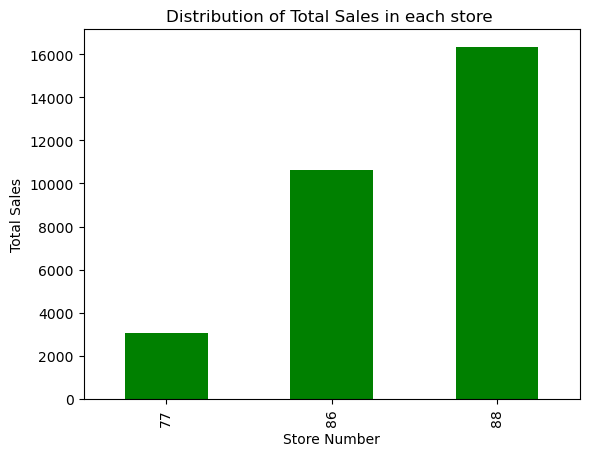

In [13]:
store_no = df.groupby('STORE_NBR')['TOT_SALES'].sum()
store_no.plot(kind="bar", color = 'green')
plt.title("Distribution of Total Sales in each store ")
plt.ylabel("Total Sales")
plt.xlabel("Store Number")
plt.show()

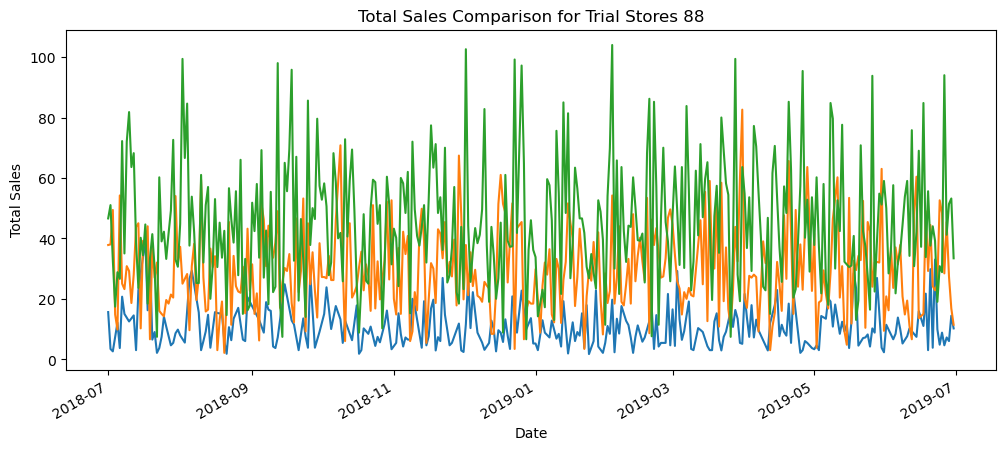

In [14]:
plt.figure(figsize=(12,5))
for store_num in df['STORE_NBR'].unique():
    single_store = df[df['STORE_NBR']==store_num]
    total_sale_overtime = single_store.groupby('DATE')['TOT_SALES'].sum()
    total_sale_overtime.plot(label = f"Store {store_num}")
    plt.title(f'Total Sales Comparison for Trial Stores {store_num}')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

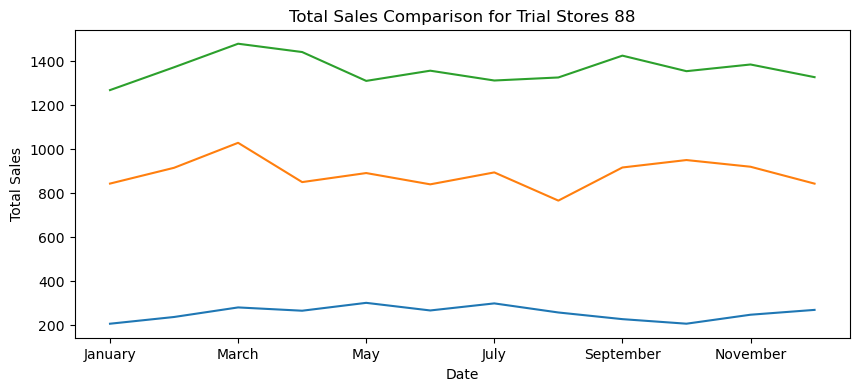

In [29]:
plt.figure(figsize=(10,4))
for store_num in df['STORE_NBR'].unique():
    
    single_store = df[df['STORE_NBR']==store_num]
    total_sale_overtime = single_store.groupby('Month')['TOT_SALES'].sum()
    total_sale_overtime.plot(kind = 'line',label = f"Store {store_num}")
    plt.title(f'Total Sales Comparison for Trial Stores {store_num}')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

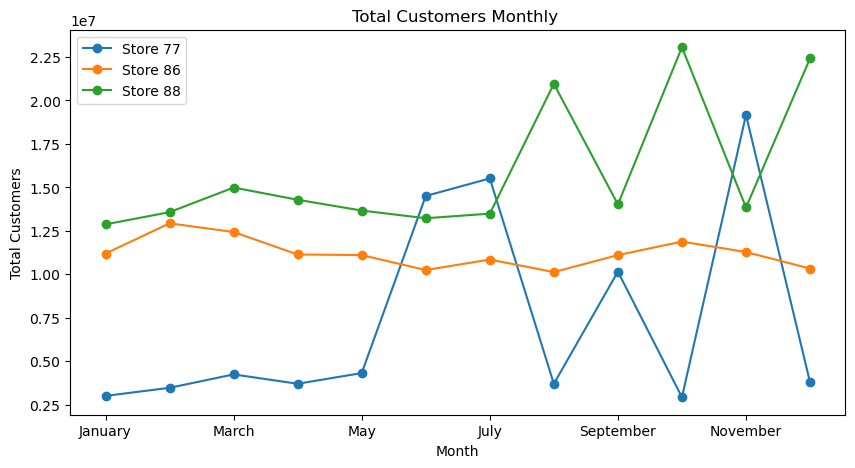

In [16]:
plt.figure(figsize=(10,5))
for i in df['STORE_NBR'].unique():
    single_store = df[df['STORE_NBR']==i]
    total_customer = single_store.groupby('Month')['LYLTY_CARD_NBR'].sum()
    total_customer.plot(label = f"Store {i}", marker ="o")
   
    

    
        
plt.title('Total Customers Monthly ')
plt.xlabel('Month')

plt.ylabel('Total Customers')
plt.legend()
plt.show()

In [17]:
df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER', 'Month'],
      dtype='object')

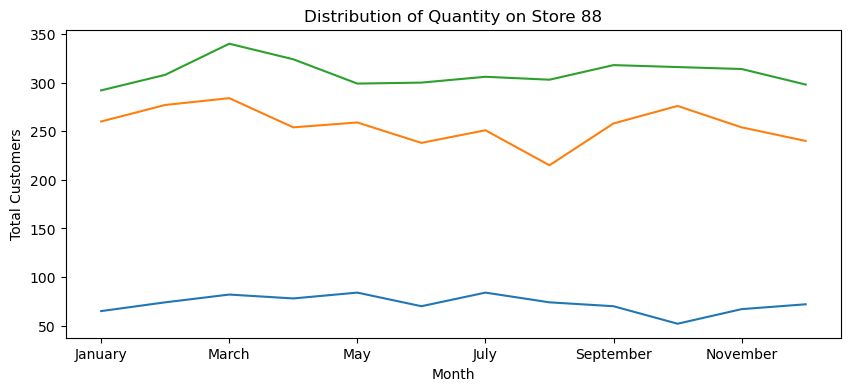

In [31]:
  plt.figure(figsize=(10,4))
for i in df['STORE_NBR'].unique():
  
    single_store = df[df['STORE_NBR']==i]
    total_customer = single_store.groupby('Month')['PROD_QTY'].sum()
    total_customer.plot(kind='line',label = f"Store {i}")
    plt.title(f'Distribution of Quantity on Store {i}')
       
plt.xlabel('Month')

plt.ylabel('Total Customers')

plt.show()

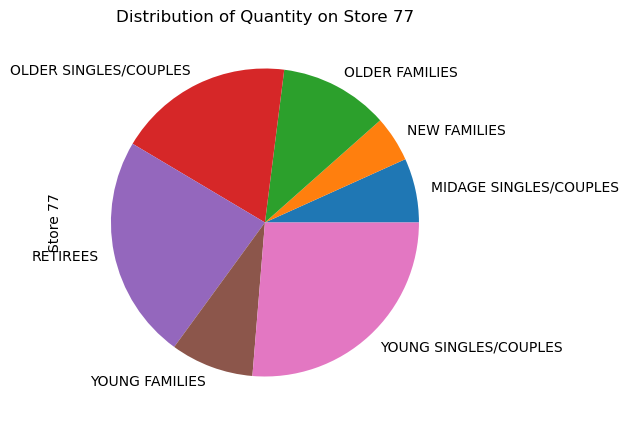

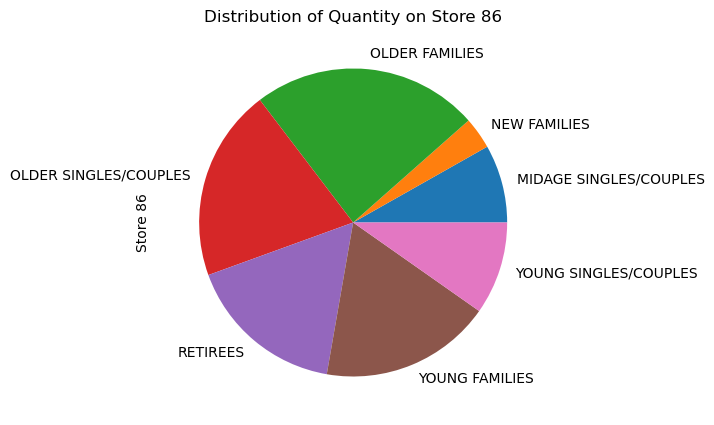

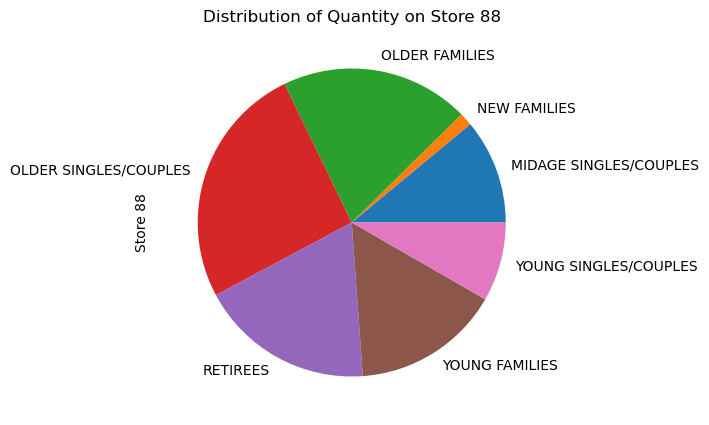

In [19]:
for i in df['STORE_NBR'].unique():
    plt.figure(figsize=(10,5))
    single_store = df[df['STORE_NBR']==i]
    total = single_store.groupby('LIFESTAGE')['TOT_SALES'].sum()
    total.plot(kind='pie',label = f"Store {i}")
    plt.title(f'Distribution of Quantity on Store {i}')
       
plt.show()

In [20]:
df['LIFESTAGE'].unique()

array(['MIDAGE SINGLES/COUPLES', 'YOUNG FAMILIES', 'RETIREES',
       'OLDER FAMILIES', 'YOUNG SINGLES/COUPLES', 'OLDER SINGLES/COUPLES',
       'NEW FAMILIES'], dtype=object)

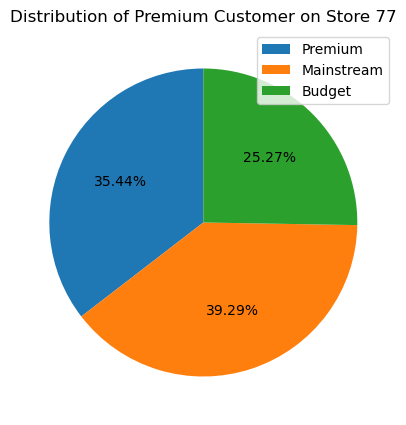

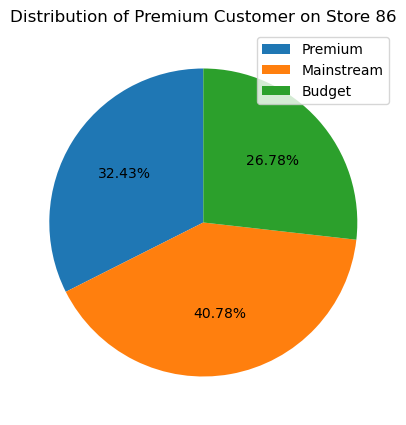

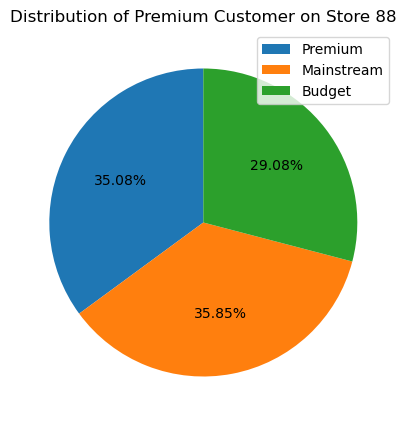

In [21]:
for i in df['STORE_NBR'].unique():
    plt.figure(figsize=(10,5))
    single_store = df[df['STORE_NBR']==i]
    total = single_store.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
    plt.pie(total,  autopct='%0.2f%%', startangle=90)
    plt.legend(['Premium', 'Mainstream', 'Budget'])

    plt.title(f'Distribution of Premium Customer on Store {i}')

plt.show()

In [22]:
df['Segment'] =  df['LIFESTAGE'] + "-" +df['PREMIUM_CUSTOMER']

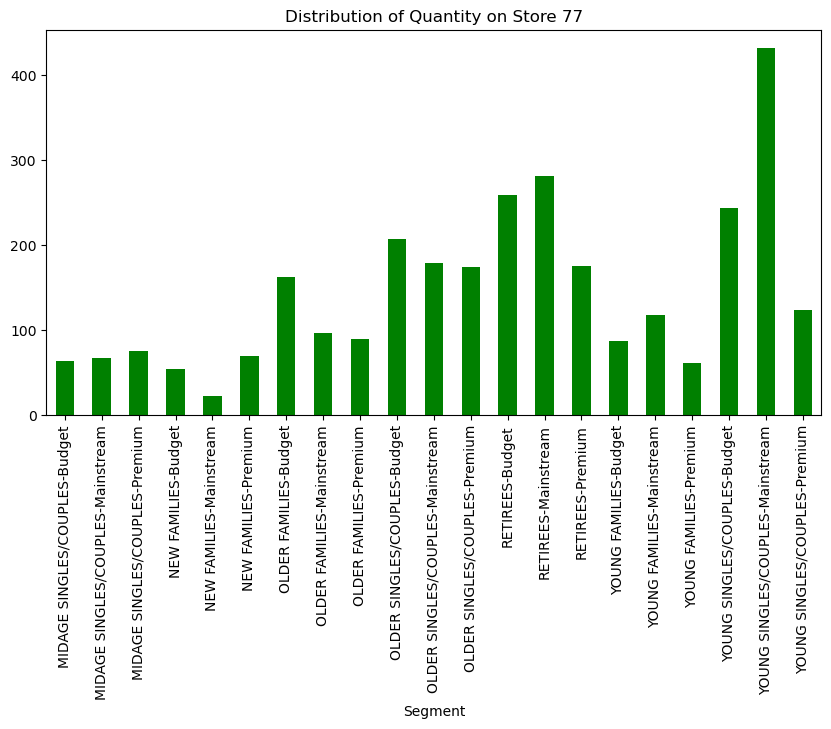

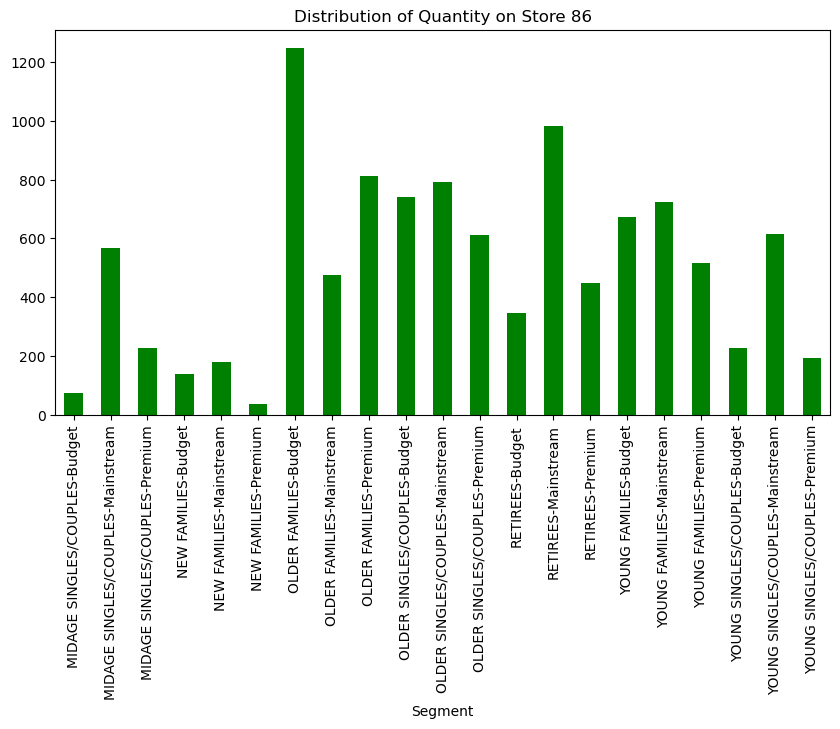

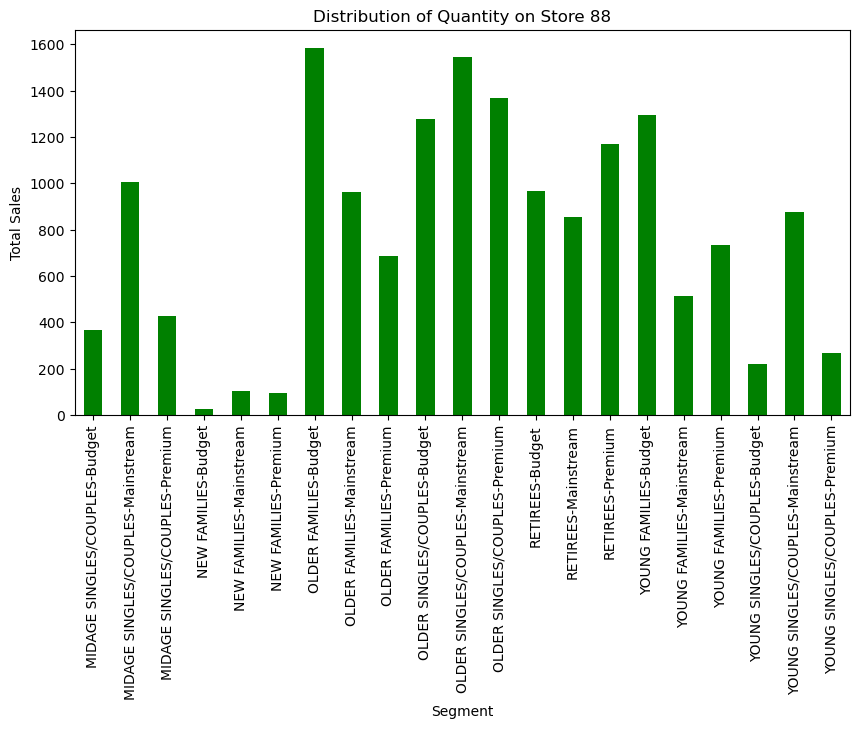

In [23]:

for i in df['STORE_NBR'].unique():
    plt.figure(figsize=(10,5))
    single_store = df[df['STORE_NBR']==i]
    total_customer = single_store.groupby('Segment')['TOT_SALES'].sum()
    total_customer.plot(kind='bar',label = f"Store {i}", color="g")
    plt.title(f'Distribution of Quantity on Store {i}')
       

plt.ylabel('Total Sales')

plt.show()

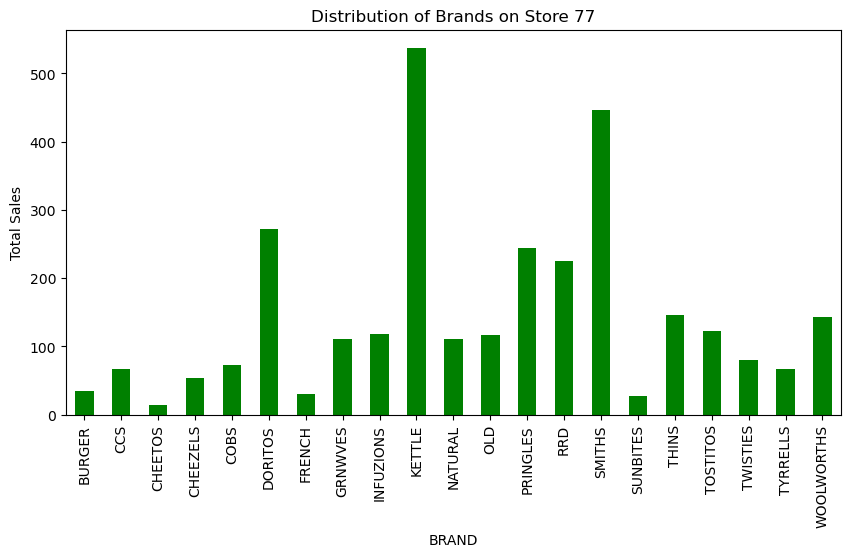

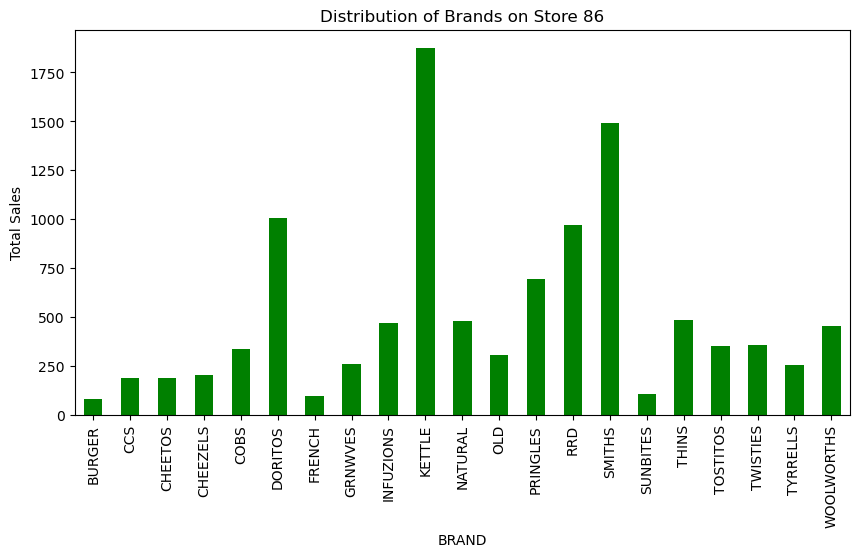

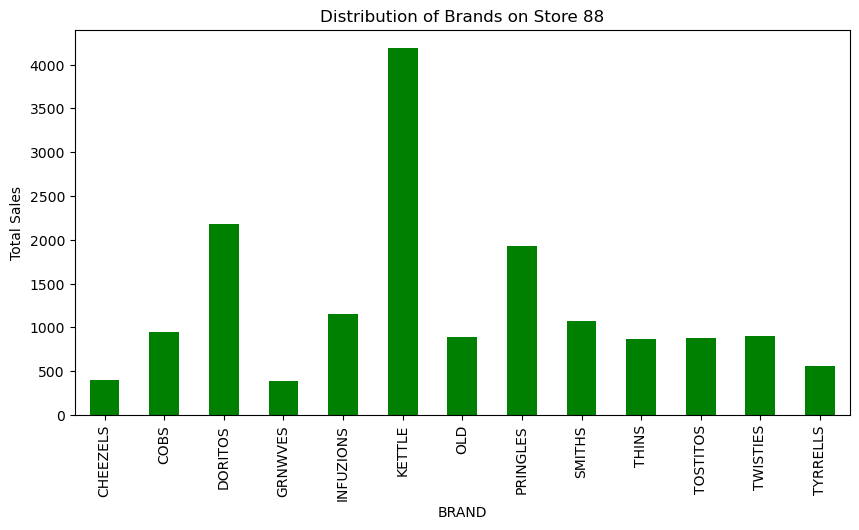

In [24]:
for i in df['STORE_NBR'].unique():
    plt.figure(figsize=(10,5))
    single_store = df[df['STORE_NBR']==i]
    brand = single_store.groupby('BRAND')['TOT_SALES'].sum()
    brand.plot(kind='bar',label = f"Store {i}", color="g")
    plt.title(f'Distribution of Brands on Store {i}')
       

    plt.ylabel('Total Sales')

plt.show()

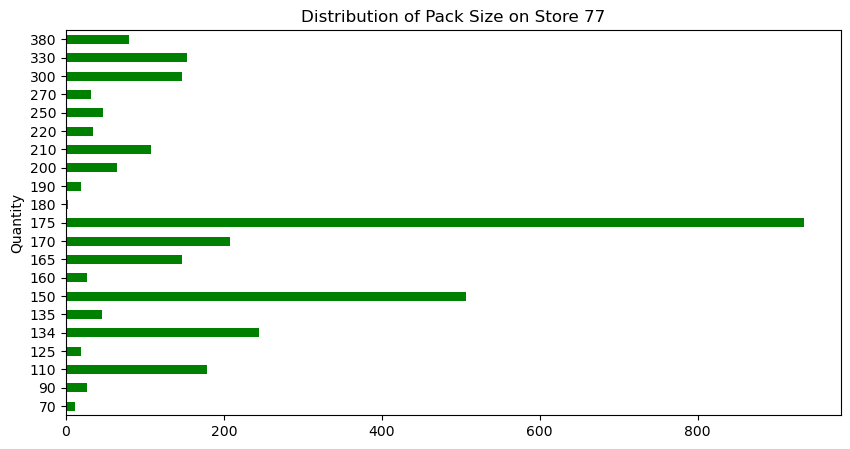

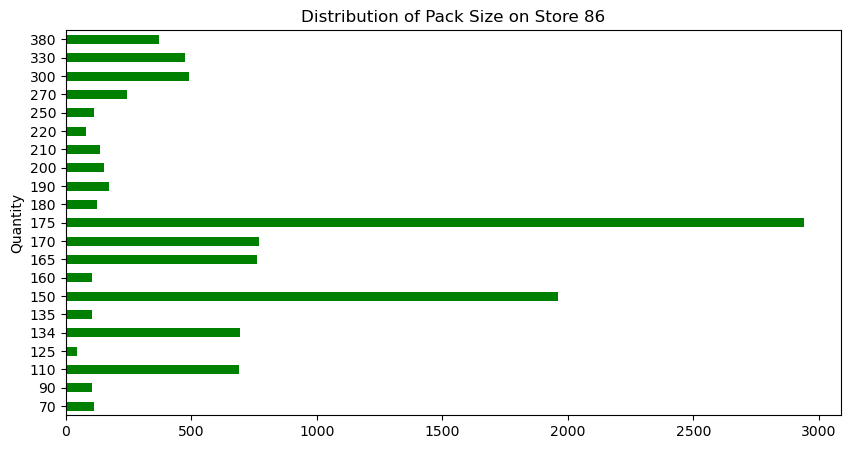

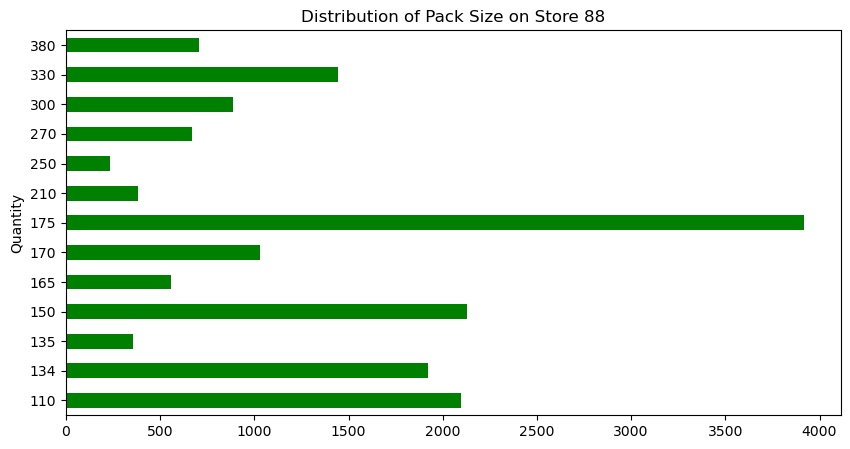

In [25]:
for i in df['STORE_NBR'].unique():
    plt.figure(figsize=(10,5))
    single_store = df[df['STORE_NBR']==i]
    brand = single_store.groupby('PACK_SIZE')['TOT_SALES'].sum()
    brand.plot(kind='barh',label = f"Store {i}", color="g")
    plt.title(f'Distribution of Pack Size on Store {i}')
    plt.ylabel('Quantity')
plt.show()

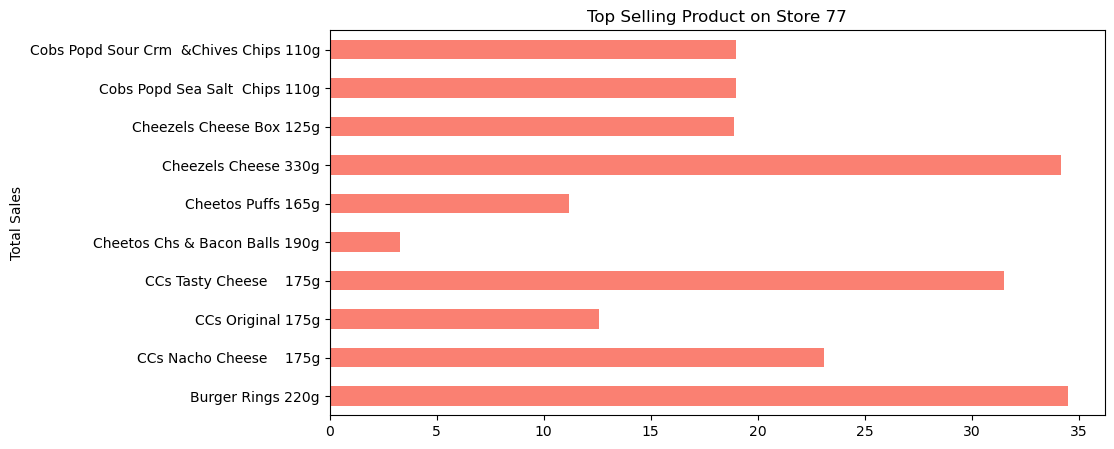

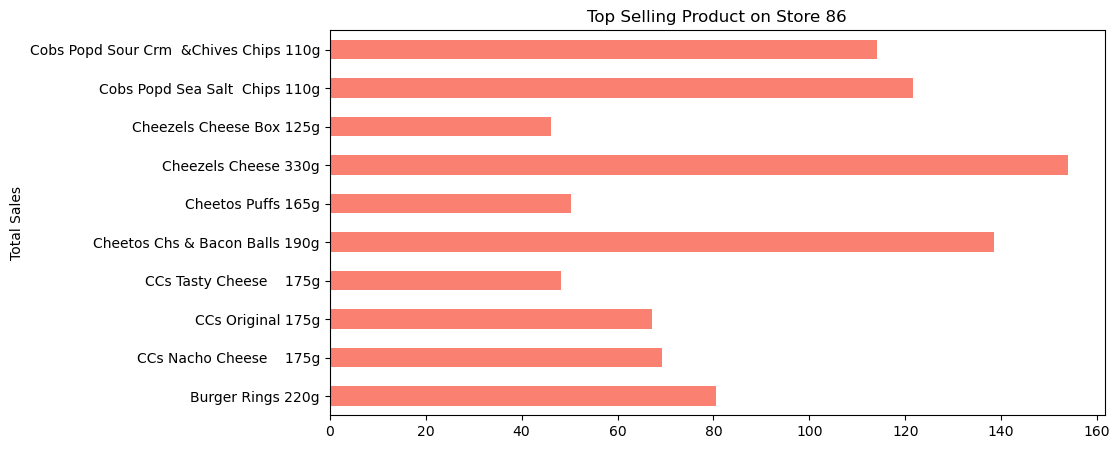

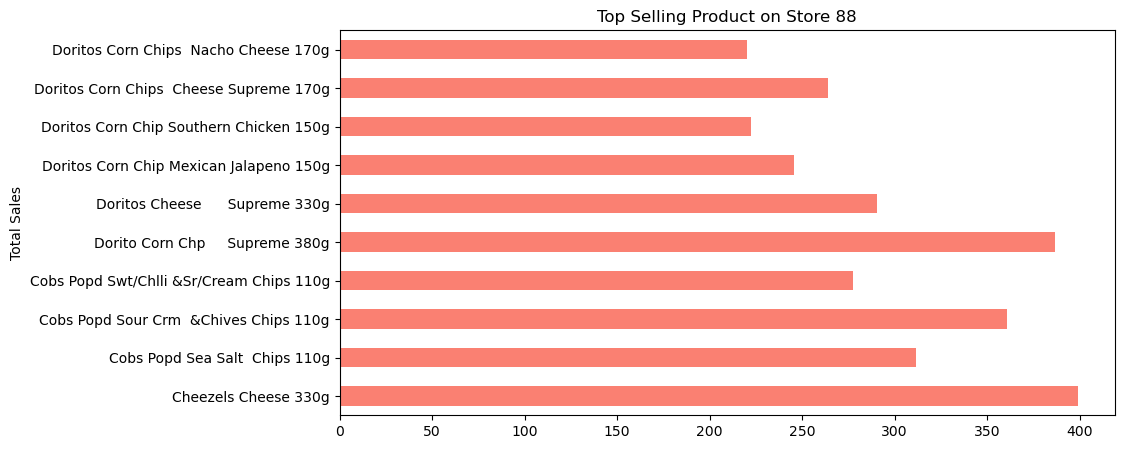

In [26]:
for i in df['STORE_NBR'].unique():
    plt.figure(figsize=(10,5))
    single_store = df[df['STORE_NBR']==i]
    brand = single_store.groupby('PROD_NAME')['TOT_SALES'].sum().head(10)
    brand.plot(kind='barh',label = f"Store {i}", color="salmon")
    plt.title(f'Top Selling Product on Store {i}')
    plt.ylabel('Total Sales')
plt.show()